In [2]:
from mixed_state.qcircuit import *
from mixed_state.utils import get_zero_state, getreal_denmat, getreal_vector
import qiskit

In [3]:
num_to_mix = 3
system_size = 2

In [4]:
zero_state = get_zero_state(system_size)
input_state = list()
angle = np.random.randint(1, 10, size=[num_to_mix, system_size, 3])
for i in range(num_to_mix):
    matrix = Identity(system_size)
    for j in range(system_size):
        row_i_mat = np.matmul(
            Z_Rotation(system_size, j, np.pi * angle[i][j][2], False),
            np.matmul(
                Y_Rotation(system_size, j, np.pi * angle[i][j][1], False),
                X_Rotation(system_size, j, np.pi * angle[i][j][0], False)))
        matrix = np.matmul(row_i_mat, matrix)
    state = np.matmul(matrix, zero_state)
    input_state.append(np.asmatrix(state))

while True:
    prob_real = np.random.dirichlet(np.ones(num_to_mix)).tolist()
    real_state = getreal_denmat(system_size, num_to_mix, prob_real, input_state)
    if (qiskit.quantum_info.purity(real_state) < 0.9999):
        break

[[ 9.40509997e-16-2.22044605e-16j]
 [-4.93038066e-32-2.08835171e-31j]
 [-1.00000000e+00+1.83697020e-16j]
 [ 4.07889322e-32+2.22044605e-16j]]
...
[[-2.06449441e-31-1.33779584e-31j]
 [-2.35127499e-16-4.99600361e-16j]
 [ 3.78431522e-16-2.35127499e-16j]
 [ 1.00000000e+00-4.89858720e-16j]]
...
[[-4.17670341e-31+3.32073328e-31j]
 [ 4.99600361e-16-2.35127499e-16j]
 [ 2.22044605e-16+9.40509997e-16j]
 [-7.96020419e-16-1.00000000e+00j]]
...


In [21]:
real_state2.conjugate().transpose()

(1, 4)

In [25]:
real_state2 = getreal_vector(system_size, num_to_mix, prob_real, input_state)
a = (real_state2 @ real_state2.conjugate().transpose())

In [24]:
real_state

matrix([[ 4.33961693e-31+0.00000000e+00j,
         -5.42932586e-47+9.82117982e-47j,
         -4.37050586e-16+1.03183087e-16j,
         -1.69680342e-31-2.50589986e-31j],
        [-5.42932586e-47-9.82117982e-47j,
          1.63206617e-31+0.00000000e+00j,
         -1.86637109e-33-1.13913527e-31j,
          9.85330832e-18+2.09363703e-17j],
        [-4.37050586e-16-1.03183087e-16j,
         -1.86637109e-33+1.13913527e-31j,
          4.64695311e-01+0.00000000e+00j,
         -1.78077558e-16+1.09260600e-16j],
        [-1.69680342e-31+2.50589986e-31j,
          9.85330832e-18-2.09363703e-17j,
         -1.78077558e-16-1.09260600e-16j,
          5.35304689e-01+0.00000000e+00j]])

In [12]:
4138 * 8

33104

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


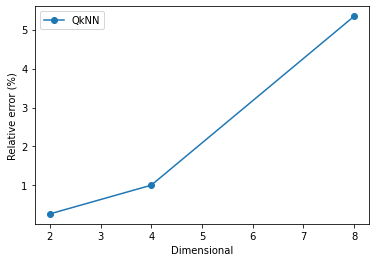

In [16]:
from matplotlib import pyplot as plt
import numpy as np
x = [2, 4, 8]
y1 = [0.27040076, 1.007444332, 5.341749829]
plt.plot(x, y1, marker='o', label = 'QkNN')
plt.xlabel('Dimensional')
# plt.xticks(np.arange(min(x) - 1, max(x) + 5, 1))
# plt.yticks(np.arange(0, 1.4, 0.2))
plt.ylabel('Relative error (%)')
plt.legend()
plt.savefig('error.eps', format='eps', dpi=600)

In [16]:
import sklearn

def bench_mark(ground_truth, predict):
    """Return predict labels QKNN algorithm
    Args:
        - ground_truth (numpy array 1D): truth labels
        - predict (numpy array 1D): predict labels
    Returns:
        - Tuple: benchmark on classifer problem
    """
    accuracy = sklearn.metrics.accuracy_score(ground_truth, predict)
    precision = sklearn.metrics.precision_score(ground_truth, predict, average="weighted")
    recall = sklearn.metrics.recall_score(ground_truth, predict, average="weighted")
    f1 = sklearn.metrics.f1_score(ground_truth, predict, average="micro")
    matrix = sklearn.metrics.confusion_matrix(ground_truth, predict)
    return accuracy, precision, recall, matrix

predict_labels = [0, 2, 0, 2, 2, 2, 2, 0, 0]

test_labels = [1, 0, 0, 1, 1, 2, 2, 1, 2]

accuracy, precision, recall, matrix = bench_mark(predict_labels, test_labels)
print('Predict labels: ', predict_labels)
print('Test labels: ', test_labels)
print('accuracy: ', accuracy)
print('precision: ', precision)
print('recall: ', recall)
print('matrix: ', matrix)

Predict labels:  [0, 2, 0, 2, 2, 2, 2, 0, 0]
Test labels:  [1, 0, 0, 1, 1, 2, 2, 1, 2]
accuracy:  0.3333333333333333
precision:  0.5925925925925926
recall:  0.3333333333333333
matrix:  [[1 2 1]
 [0 0 0]
 [1 2 2]]


C:\Users\haime\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
import qiskit
import numpy as np
import qtm.nqubit, qtm.custom_gate

In [2]:
random_sv = qiskit.quantum_info.random_statevector(8)

In [26]:
qc = qiskit.QuantumCircuit(3)
qc.initialize(random_sv.data, [0, 1, 2])
qc = qtm.nqubit.create_Wchainchecker_haar(qc, thetas, num_layers)
# qc.draw('mpl')
state = (qiskit.quantum_info.Statevector.from_instruction(qc))
qiskit.quantum_info.purity(state)

1.0

In [3]:
from qiskit import *
from qiskit.quantum_info.states.utils import partial_trace
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

sim =  Aer.get_backend('statevector_simulator')
res = execute(qc, sim, shots=100).result()
state_vec = res.get_statevector()

# Remove qubit zero
print(partial_trace(state_vec, [0]))

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


In [6]:
import pennylane as qml
from pennylane import numpy as np

# we generate a three-dimensional random vector by sampling
# each entry from a standard normal distribution
v = np.random.normal(0, 1, 3)

# purity of the target state
purity = 0.66

# create a random Bloch vector with the specified purity
bloch_v = np.sqrt(2 * purity - 1) * v / np.sqrt(np.sum(v ** 2))

# array of Pauli matrices (will be useful later)
Paulis = np.zeros((3, 2, 2), dtype=complex)
Paulis[0] = [[0, 1], [1, 0]]
Paulis[1] = [[0, -1j], [1j, 0]]
Paulis[2] = [[1, 0], [0, -1]]



C:\Users\haime\AppData\Roaming\Python\Python38\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [7]:
# number of qubits in the circuit
nr_qubits = 3
# number of layers in the circuit
nr_layers = 2

# randomly initialize parameters from a normal distribution
params = np.random.normal(0, np.pi, (nr_qubits, nr_layers, 3))

# a layer of the circuit ansatz
def layer(params, j):
    for i in range(nr_qubits):
        qml.RX(params[i, j, 0], wires=i)
        qml.RY(params[i, j, 1], wires=i)
        qml.RZ(params[i, j, 2], wires=i)

    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[1, 2])

In [11]:
dev = qml.device("default.qubit", shots=1000, wires = 3)

In [12]:
@qml.qnode(dev)
def circuit(params, A=None):

    # repeatedly apply each layer in the circuit
    for j in range(nr_layers):
        layer(params, j)

    # returns the expectation of the input matrix A on the first qubit
    return qml.expval(qml.Hermitian(A, wires=0))

In [13]:
# cost function
def cost_fn(params):
    cost = 0
    for k in range(3):
        cost += np.abs(circuit(params, A=Paulis[k]) - bloch_v[k])

    return cost

# set up the optimizer
opt = qml.AdamOptimizer()

# number of steps in the optimization routine
steps = 200

# the final stage of optimization isn't always the best, so we keep track of
# the best parameters along the way
best_cost = cost_fn(params)
best_params = np.zeros((nr_qubits, nr_layers, 3))

print("Cost after 0 steps is {:.4f}".format(cost_fn(params)))

# optimization begins
for n in range(steps):
    params = opt.step(cost_fn, params)
    current_cost = cost_fn(params)

    # keeps track of best parameters
    if current_cost < best_cost:
        best_params = params

    # Keep track of progress every 10 steps
    if n % 10 == 9 or n == steps - 1:
        print("Cost after {} steps is {:.4f}".format(n + 1, current_cost))

# calculate the Bloch vector of the output state
output_bloch_v = np.zeros(3)
for l in range(3):
    output_bloch_v[l] = circuit(best_params, A=Paulis[l])

# print results
print("Target Bloch vector = ", bloch_v)
print("Output Bloch vector = ", output_bloch_v)

Cost after 0 steps is 0.9254
Cost after 10 steps is 0.4622
Cost after 20 steps is 0.2854
Cost after 30 steps is 0.1463
Cost after 40 steps is 0.1577
Cost after 50 steps is 0.0906
Cost after 60 steps is 0.1026
Cost after 70 steps is 0.1377
Cost after 80 steps is 0.0546
Cost after 90 steps is 0.0897
Cost after 100 steps is 0.0642
Cost after 110 steps is 0.0822
Cost after 120 steps is 0.0577
Cost after 130 steps is 0.0623
Cost after 140 steps is 0.0686
Cost after 150 steps is 0.0897
Cost after 160 steps is 0.0314
Cost after 170 steps is 0.0502
Cost after 180 steps is 0.0794
Cost after 190 steps is 0.0254
Cost after 200 steps is 0.0594
Target Bloch vector =  [-0.23943709 -0.36097758 -0.3638201 ]
Output Bloch vector =  [-0.288 -0.356 -0.336]
